# British Airways Customer Booking Prediction Task 2

In [9]:
import pandas as pd

# Imported the CSV file

In [10]:
df = pd.read_csv(r"C:\Users\Derek Winters\Downloads\customer_booking.csv", encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Check unique values in the flight_day column

In [11]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

# Map days of the week to numeric values:

In [12]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [13]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

# Descriptive statistics

In [14]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# Handling missing values

In [15]:
df.isnull().sum()


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

# Encoding categorical variables

In [41]:
# Define the columns that need to be one-hot encoded (based on what exists in the dataframe)
columns_to_encode = ['booking_origin', 'flight_day']

# One-hot encode only the columns that exist in the dataframe
df_encoded = pd.get_dummies(df, columns=[col for col in columns_to_encode if col in df.columns])

# Verify the result
print(df_encoded.head())


   num_passengers  trip_type  purchase_lead  length_of_stay  flight_hour  \
0             2.0        0.0          262.0            19.0          7.0   
1             1.0        0.0          112.0            20.0          3.0   
2             2.0        0.0          243.0            22.0         17.0   
3             1.0        0.0           96.0            31.0          4.0   
4             2.0        0.0           68.0            22.0         15.0   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                  1.0                   0.0                    0.0   
1                  0.0                   0.0                    0.0   
2                  1.0                   1.0                    0.0   
3                  0.0                   0.0                    1.0   
4                  1.0                   0.0                    1.0   

   flight_duration  booking_complete  ...  booking_origin_94  \
0             5.52               0.0  ...           

# Split the data into training and testing sets

In [42]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df_encoded.drop(columns=['booking_complete'])  # All columns except the target
y = df_encoded['booking_complete']  # The target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")



Training set shape: (40000, 919)
Test set shape: (10000, 919)


# Train the Random Forest model

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with class_weight='balanced'
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
rf_model_balanced.fit(X_train, y_train)

# Predict on the test set
y_pred_balanced = rf_model_balanced.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

# Accuracy and classification report
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"Accuracy (with balanced class weight): {accuracy_balanced:.4f}")
print(classification_report(y_test, y_pred_balanced))


Accuracy (with balanced class weight): 0.8554
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      8520
         1.0       0.55      0.12      0.20      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.55      0.56     10000
weighted avg       0.82      0.86      0.81     10000



# few feature engineering that could improve the model

# One-Hot Encoding Categorical Variables

In [48]:
# Updated columns to encode (excluding 'flight_day' since it is already numeric)
columns_to_encode = ['trip_type', 'booking_origin', 'wants_extra_baggage', 
                     'wants_preferred_seat', 'wants_in_flight_meals']

# Apply one-hot encoding to the relevant columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Display the new column names
print(df_encoded.columns)


Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_duration', 'booking_complete', 'sales_channel_Mobile',
       'route_AKLHGH', 'route_AKLHND', 'route_AKLICN',
       ...
       'booking_origin_97', 'booking_origin_98', 'booking_origin_99',
       'booking_origin_100', 'booking_origin_101', 'booking_origin_102',
       'booking_origin_103', 'wants_extra_baggage_1.0',
       'wants_preferred_seat_1.0', 'wants_in_flight_meals_1.0'],
      dtype='object', length=919)


# Create "Time of Day" from flight_hour

In [49]:
# Define a function to categorize the flight hour into 'Time of Day'
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'time_of_day'
df['time_of_day'] = df['flight_hour'].apply(get_time_of_day)

# Check the unique values to see how it looks
print(df['time_of_day'].unique())


['Morning' 'Night' 'Afternoon' 'Evening']


# Bucket purchase_lead and length_of_stay

In [50]:
# Bucket 'purchase_lead'
purchase_lead_bins = [0, 30, 90, 180, float('inf')]
purchase_lead_labels = ['Short-term', 'Medium-term', 'Long-term', 'Very long-term']
df['purchase_lead_buckets'] = pd.cut(df['purchase_lead'], bins=purchase_lead_bins, labels=purchase_lead_labels)

# Bucket 'length_of_stay'
length_of_stay_bins = [0, 3, 7, float('inf')]
length_of_stay_labels = ['Short stay', 'Medium stay', 'Long stay']
df['length_of_stay_buckets'] = pd.cut(df['length_of_stay'], bins=length_of_stay_bins, labels=length_of_stay_labels)

# Check the new columns
print(df[['purchase_lead', 'purchase_lead_buckets', 'length_of_stay', 'length_of_stay_buckets']].head())


   purchase_lead purchase_lead_buckets  length_of_stay length_of_stay_buckets
0          262.0        Very long-term            19.0              Long stay
1          112.0             Long-term            20.0              Long stay
2          243.0        Very long-term            22.0              Long stay
3           96.0             Long-term            31.0              Long stay
4           68.0           Medium-term            22.0              Long stay


# Combine Customer Preferences (wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals)

In [51]:
# Combine the customer preferences into a single column 'total_preferences'
df['total_preferences'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

# Check the new column
print(df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'total_preferences']].head())


   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                  1.0                   0.0                    0.0   
1                  0.0                   0.0                    0.0   
2                  1.0                   1.0                    0.0   
3                  0.0                   0.0                    1.0   
4                  1.0                   0.0                    1.0   

   total_preferences  
0                1.0  
1                0.0  
2                2.0  
3                1.0  
4                2.0  


# Split the data into training and test sets again

In [52]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['booking_complete'])  # Features
y = df['booking_complete']  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')


Training set shape: (40000, 820)
Test set shape: (10000, 820)


# One-Hot Encode the categorical features

In [54]:
# One-Hot Encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Check the columns after encoding
print(X_encoded.columns)


Index(['num_passengers', 'trip_type', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       ...
       'flight_day_7', 'total_preferences', 'time_of_day_Evening',
       'time_of_day_Morning', 'time_of_day_Night',
       'purchase_lead_buckets_Medium-term', 'purchase_lead_buckets_Long-term',
       'purchase_lead_buckets_Very long-term',
       'length_of_stay_buckets_Medium stay',
       'length_of_stay_buckets_Long stay'],
      dtype='object', length=825)


# Train the Random Forest model

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Balanced to handle class imbalance

# Train the model
rf_model.fit(X_encoded.loc[X_train.index], y_train)

# Evaluate the model on the test set
accuracy = rf_model.score(X_encoded.loc[X_test.index], y_test)
print(f'Model accuracy: {accuracy:.4f}')


Model accuracy: 0.8532


# Evaluate the Model using Classification Report

In [56]:
from sklearn.metrics import classification_report

# Predictions on the test set
y_pred = rf_model.predict(X_encoded.loc[X_test.index])

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      8520
         1.0       0.52      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000



# Feature Importance Visualization

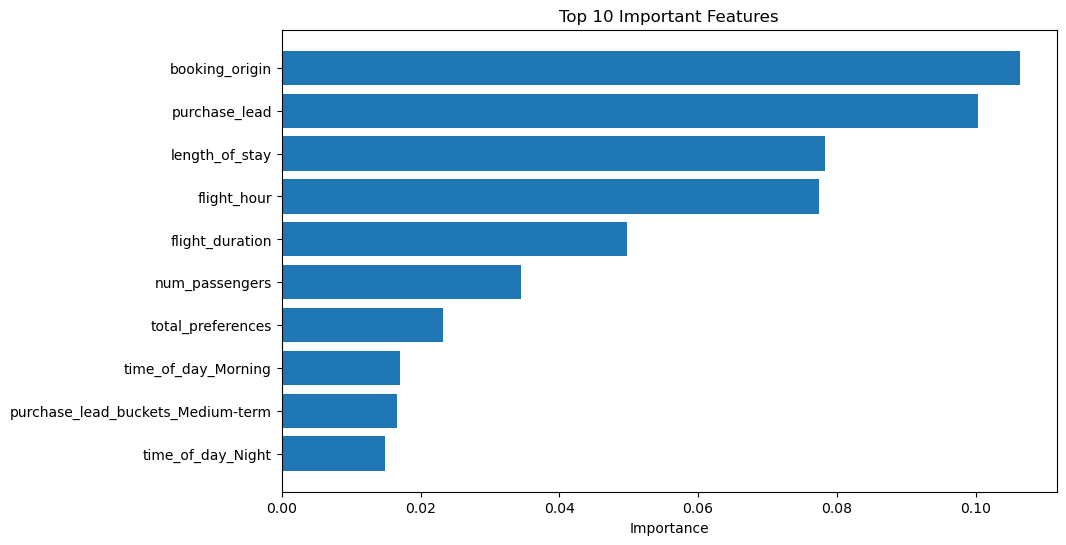

In [57]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()
